## Import the relevant packages

In [91]:
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data

In [53]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

# Let's take 10% of the train data as our validation subset
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
# Convert to integer
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)


# Let's define a function to scale the data to fit range(0,1)
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255. # the . signifies that we want a float result
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

# Let's shuffle the data

BUFFER_SIZE = 10000 
# Can't shuffle all data as once; shuffle 10,000 at a time

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
# takes the first 10% of the data

train_data = shuffled_train_and_validation_data.skip(num_validation_samples)
# skips the first 10% of data, takes the rest

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

# Validation data must have the same shape, properties as the train and test data
validation_inputs, validation_targets = next(iter(validation_data))             

## Model

### Outline the model

In [103]:
input_size = 784
output_size = 10
hidden_layer_size = 200

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax')
                            ])

### Choose the optimizer and the loss function

In [104]:
# Let's use the adaptive moment estimation as our optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training

In [105]:
NUM_EPOCHS = 7

training = model.fit(train_data, epochs = NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/7
540/540 - 4s - loss: 0.2733 - accuracy: 0.9198 - val_loss: 0.1414 - val_accuracy: 0.9600
Epoch 2/7
540/540 - 4s - loss: 0.1033 - accuracy: 0.9692 - val_loss: 0.0862 - val_accuracy: 0.9750
Epoch 3/7
540/540 - 3s - loss: 0.0700 - accuracy: 0.9790 - val_loss: 0.0638 - val_accuracy: 0.9803
Epoch 4/7
540/540 - 4s - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.0523 - val_accuracy: 0.9827
Epoch 5/7
540/540 - 4s - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0537 - val_accuracy: 0.9830
Epoch 6/7
540/540 - 4s - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0426 - val_accuracy: 0.9873
Epoch 7/7
540/540 - 4s - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0352 - val_accuracy: 0.9883


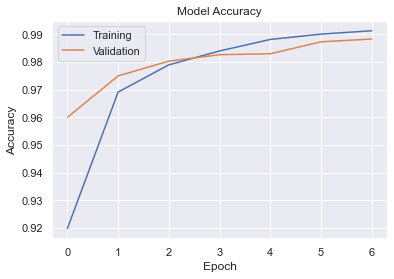

In [106]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

## Test the model

In [107]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9806


In [108]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100))

Test loss: 0.07. Test accuracy: 98.06%
